0.16644465791657914
1.3420834208342087


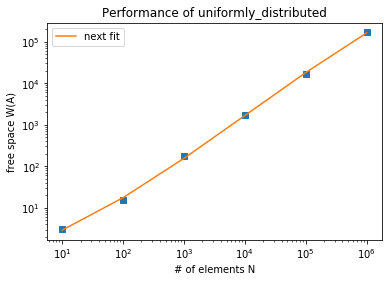

0.01199421341213412
0.8865878658786587


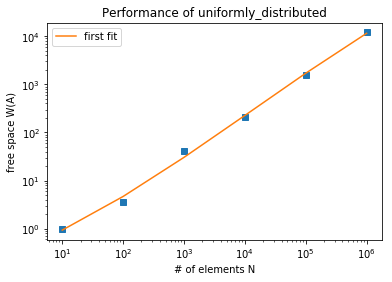

0.00030107548075480753
1.003519245192452


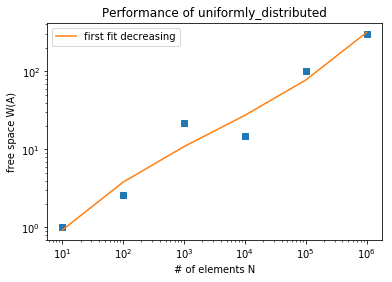

0.0016050895208952088
0.9904791047910478


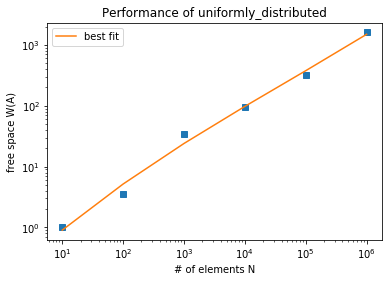

0.00029107538075380757
1.0036192461924618


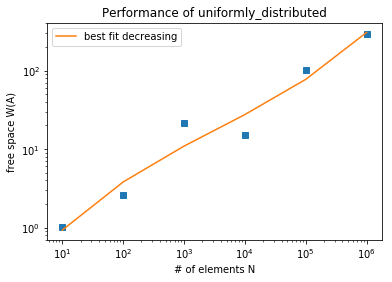

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.interpolate as ip


def plot_timings_from_file(fname):
    timings = pd.read_csv(fname, sep=',')
    funcname = timings['fit function']
    #print(funcname)
    la=['next fit','first fit','first fit decreasing','best fit','best fit decreasing']
    
    
    lab_index=0
    while lab_index < 5:
        
        i=lab_index
        x=[]
        y=[]
        while i < len(timings['number of int']):

            x.append(timings['number of int'][i])
            y.append(timings['free space'][i])
            i+=5
        
        sl = (y[-1]-y[0])/(x[-1]-x[0])
        ini = y[0]-sl*x[0]
        print(sl)
        print(ini)
        
        
        plt.loglog(x, y, 's')
#         s = ip.UnivariateSpline(x, y, s = 0)
#         xs = np.linspace(min(x), max(x), 1000)
#         ys = s(xs)
#         plt.plot(xs, ys,label=la[lab_index])
        
        
        logx = np.log(x)
        logy = np.log(y)
        coeffs = np.polyfit(logx,logy,deg=3)
        poly = np.poly1d(coeffs)
        yfit = lambda x: np.exp(poly(np.log(x)))
        plt.loglog(x,yfit(x),label=la[lab_index])
        
        
        plt.xlabel('# of elements N')
        plt.ylabel('free space W(A)')
        plt.title('Performance of uniformly_distributed')
        plt.legend()
       # plt.rcParams['figure.figsize'] = [100, 50]
        plt.show()
        
        lab_index+=1
       
    
plot_timings_from_file('free_space_of_uniformly_distributed.csv')